In [0]:
-------------------------------------------------------------------------------
-- Federal University of Santa Maria
-- Technology Center
-- Computer Engineering Course
--
-- Author : Luis Felipe de Deus
--
-- Created: 04 Jun 2020
-- Update : 04 Jun 2020
-------------------------------------------------------------------------------

####### JUST A SMALL IMPLEMENTATION OF ARTIFICIAL NEURAL NETWORK

####### USING KERAS CONV NET

In [1]:
# Download the input files 
!gdown https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73

# Download the labels files
!gdown https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7

Downloading...
From: https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73
To: /content/X.npy
33.8MB [00:00, 127MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7
To: /content/Y.npy
100% 165k/165k [00:00<00:00, 49.3MB/s]


In [0]:
#Import the Libraries we need
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split

In [0]:
# Read data
X = np.load('X.npy')
Y = np.load('Y.npy')

#Reorganize the lables
cats = [9,0,7,6,1,8,4,3,2,5]
Y[:,cats] = Y[:,range(10)]

In [4]:
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

X.shape = (2062, 64, 64)
Y.shape = (2062, 10)


Mostrando 1


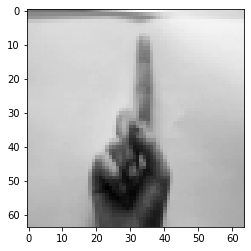

Mostrando 0


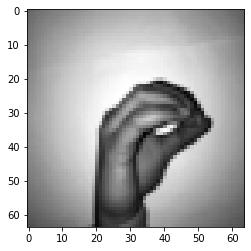

Mostrando 2


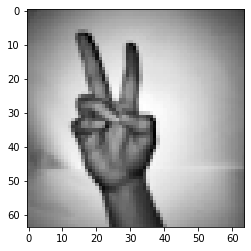

Mostrando 3


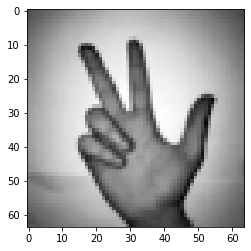

Mostrando 5


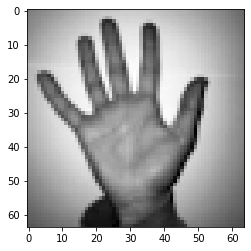

In [5]:
# Total samples
total = X.shape[0]

# Show 5 figures
for i in range(5):
  k = np.random.randint(0,total)
  print('Mostrando',np.argmax(Y[k,:]))
  plt.imshow(X[k,:,:], cmap='gray')
  plt.show()

In [0]:
#Split the dataset into train and test 
test_size = 0.1 #10%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                        test_size=test_size, \
                                        random_state=42)

In [7]:
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test :',X_test.shape)
print('Y_test :',Y_test.shape)

X_train: (1855, 64, 64)
Y_train: (1855, 10)
X_test : (207, 64, 64)
Y_test : (207, 10)


In [0]:
# Reshape the input to feed the neural network properly
# 1:samples, 2:line, 3:columns, 4:channels
#In this case the images are monocromatic, so 1-d we have to add this dimension
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [9]:
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test :',X_test.shape)
print('Y_test :',Y_test.shape)

X_train: (1855, 64, 64, 1)
Y_train: (1855, 10)
X_test : (207, 64, 64, 1)
Y_test : (207, 10)


In [0]:
p = tf.keras.models.Sequential([
      # 1 Convolution layer
      tf.keras.layers.Conv2D(32, (5, 5), activation='relu',
                             input_shape=(64, 64, 1)),
      # 2 Convolution layer
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      # 3 Max Pooling Layer
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      # Dropout
      tf.keras.layers.Dropout(0.25),
      # Serialize with flatten
      tf.keras.layers.Flatten(),
      # Hidden layer with 128 neurons
      tf.keras.layers.Dense(128, activation='relu'),
      # Dropout
      tf.keras.layers.Dropout(0.25),
      # Output layer with softmax
      tf.keras.layers.Dense(10, activation='softmax')
    ])

In [11]:
#Summarize the neural network
p.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6889600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
#Compile the Neural Network
p.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [13]:
# Training the neural network
h = p.fit(X_train, Y_train, \
         batch_size=32, epochs=100, \
         validation_data=(X_test, Y_test),
         shuffle=True)

Epoch 1/100
58/58 [==============================] - 1s 13ms/step - loss: 2.0862 - accuracy: 0.2900 - val_loss: 1.3224 - val_accuracy: 0.6232
Epoch 2/100
58/58 [==============================] - 1s 9ms/step - loss: 0.9560 - accuracy: 0.6830 - val_loss: 0.8622 - val_accuracy: 0.6618
Epoch 3/100
58/58 [==============================] - 1s 9ms/step - loss: 0.6205 - accuracy: 0.7844 - val_loss: 0.6336 - val_accuracy: 0.8019
Epoch 4/100
58/58 [==============================] - 0s 9ms/step - loss: 0.4346 - accuracy: 0.8544 - val_loss: 0.6841 - val_accuracy: 0.7633
Epoch 5/100
58/58 [==============================] - 1s 9ms/step - loss: 0.3105 - accuracy: 0.8938 - val_loss: 0.4898 - val_accuracy: 0.8454
Epoch 6/100
58/58 [==============================] - 1s 9ms/step - loss: 0.2030 - accuracy: 0.9429 - val_loss: 0.5261 - val_accuracy: 0.8068
Epoch 7/100
58/58 [==============================] - 0s 9ms/step - loss: 0.1627 - accuracy: 0.9472 - val_loss: 0.5048 - val_accuracy: 0.8406
Epoch 8/100


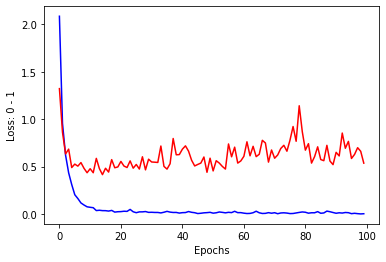

In [15]:
#Plot learning curve - loss
plt.plot(h.history['loss'],  color='blue')
plt.plot(h.history['val_loss'],  color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss: 0 - 1')
plt.show()

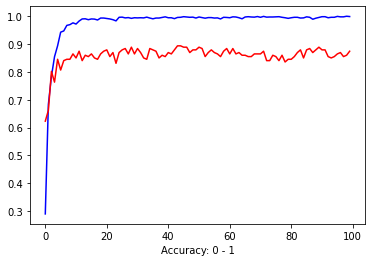

In [16]:
#Plot learning curve - Accuracy
plt.plot(h.history['accuracy'],  color='blue')
plt.plot(h.history['val_accuracy'],  color='red')
plt.xlabel('Epochs')
plt.xlabel('Accuracy: 0 - 1')
plt.show()

In [17]:
#Evaluate the neural network
#First using training data
loss, accuracy = p.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data:', round(100*accuracy,2), '%')

#Second using test data
loss, accuracy = p.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data:', round(100*accuracy,2), '%')

Accuracy on training data: 100.0 %
Accuracy on test data: 87.44 %


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Y=8, Predicted=[8]
Showing 8


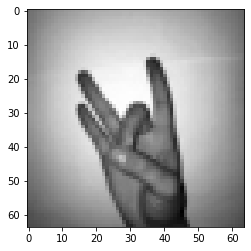

Y=2, Predicted=[2]
Showing 2


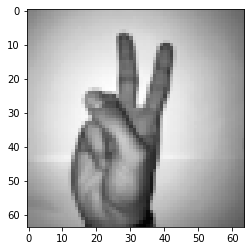

Y=7, Predicted=[7]
Showing 7


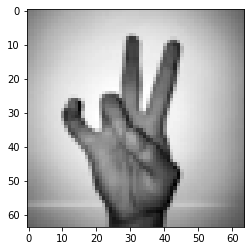

Y=6, Predicted=[6]
Showing 6


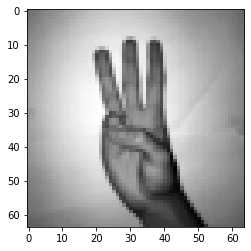

Y=7, Predicted=[7]
Showing 7


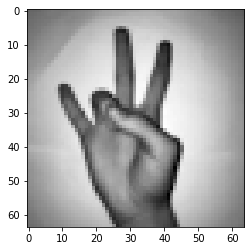

Y=7, Predicted=[7]
Showing 7


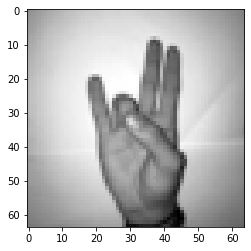

Y=0, Predicted=[0]
Showing 0


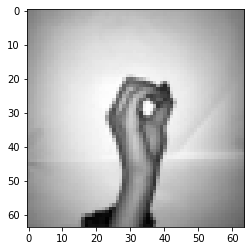

Y=0, Predicted=[0]
Showing 0


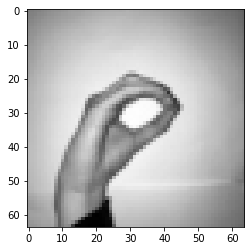

Y=5, Predicted=[5]
Showing 5


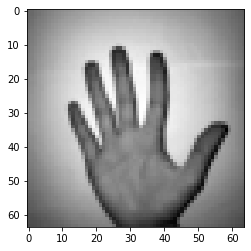

Y=7, Predicted=[7]
Showing 7


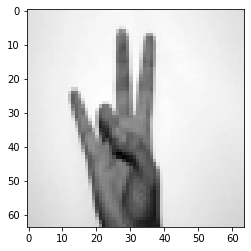

In [18]:
#y_pred = p.predict_classes(X_test[0:4])
# show the inputs and predicted outputs
for i in range(10):
  k = np.random.randint(0,X_test.shape[0])

  x = X_test[k]
  x = x.reshape(64,64)
  y = Y_test[k]
  y_pred = p.predict_classes(X_test[k:k+1])
  print("Y=%s, Predicted=%s" % (np.argmax(y), y_pred))
  print('Showing',np.argmax(y))
  
  plt.imshow(x, cmap='gray')
  plt.show()